# Data Exploration

In [2]:
import re
import os
import csv
import json
import matplotlib.pyplot as plt

from tqdm import tqdm
from random import randint, choice
from PIL import Image, ImageOps
from pathlib import Path, PurePath
from collections import Counter

## Manual exploration

### 1. Visualise the data

In [3]:
fldrs = Path.cwd() / 'CV_data' /'Extracted_dataset_input_combined'
files = []
for fldr in fldrs.iterdir():
  files_in_fldr = sorted(fldr.glob('**/*'))
  files.extend(files_in_fldr)

n_files = len(files)
n_files

68441

In [4]:

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

from torchvision import datasets
from torchvision import transforms
import numpy as np
import cv2

In [5]:
def plot_histogram(img):
    img = np.array(img)
    # define colors to plot the histograms
    colors = ('b','g','r')

    # compute and plot the image histograms
    for i,color in enumerate(colors):
        non_white_pixels = img[..., i] < 250

        hist = cv2.calcHist([img],[i],non_white_pixels.astype(np.uint8),[256],[0,256])
        plt.plot(hist,color = color)
    plt.title('Image Histogram GFG')
    return plt

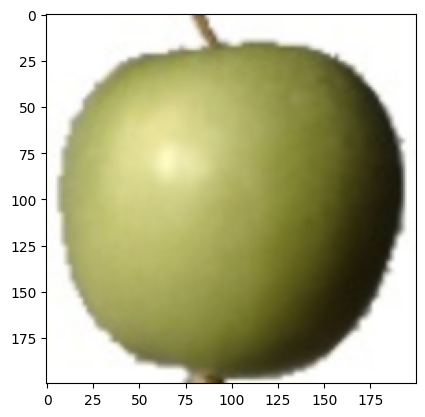

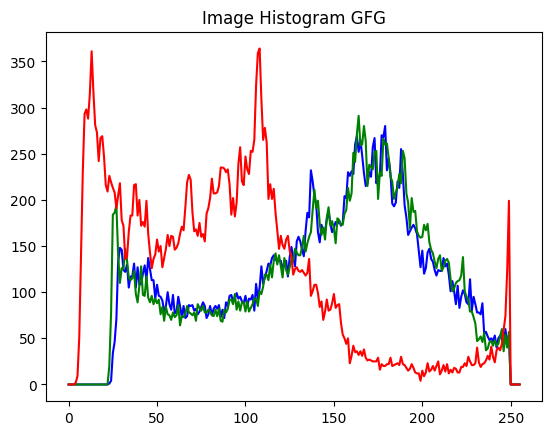

tensor(0.6155)


In [6]:
fldr = Path.cwd() / 'CV_data' /'Extracted_dataset_input_combined' / 'apple'
file = fldr / "apple_granny_smith_10_100.jpg"
img =  Image.open(file).convert("RGB")

RESOLUTION = 200
transform = transforms.Compose([
    transforms.Resize(RESOLUTION),
    transforms.CenterCrop(RESOLUTION),
])

img = transform(img)
plt.imshow(img)
plt.show()

plt = plot_histogram(img)
plt.show()

transform = transforms.ToTensor()
img = transform(img)

print(img.mean())


# break




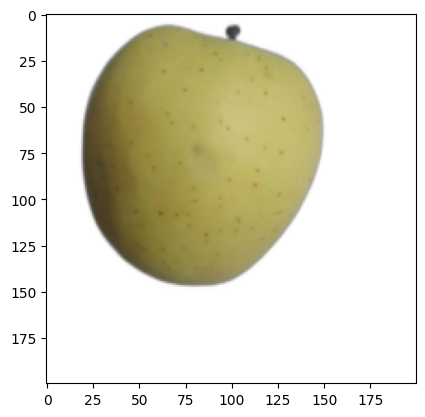

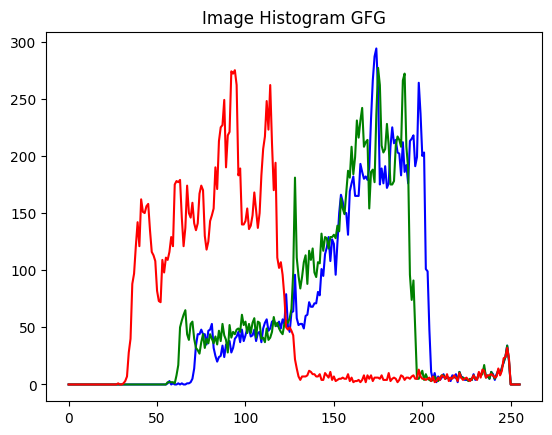

tensor(0.8243)


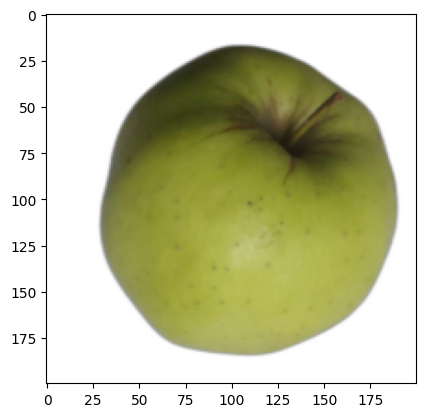

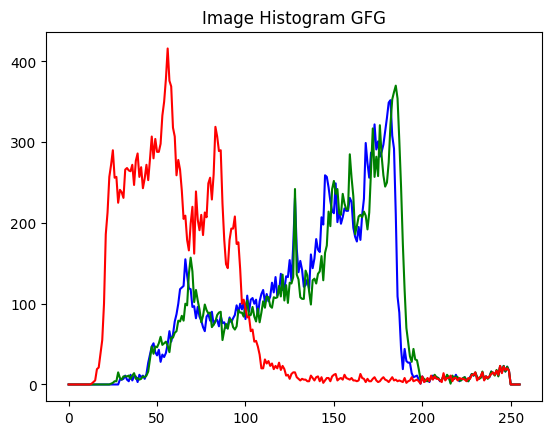

tensor(0.7023)


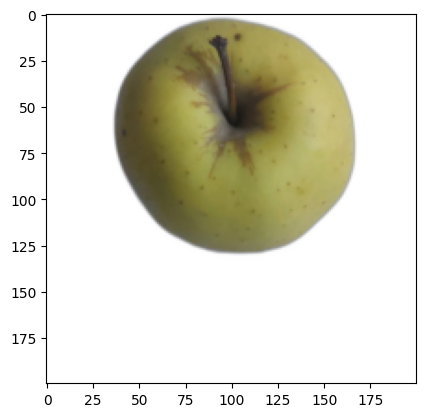

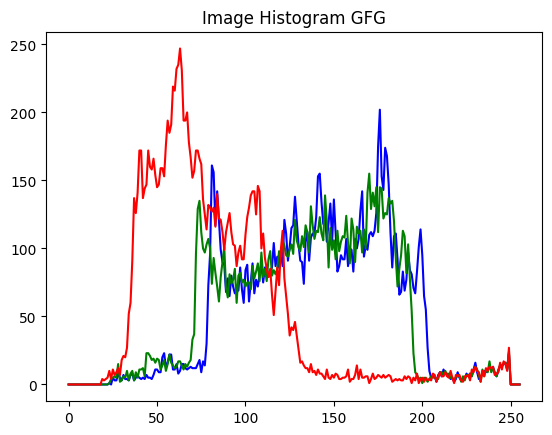

tensor(0.8211)


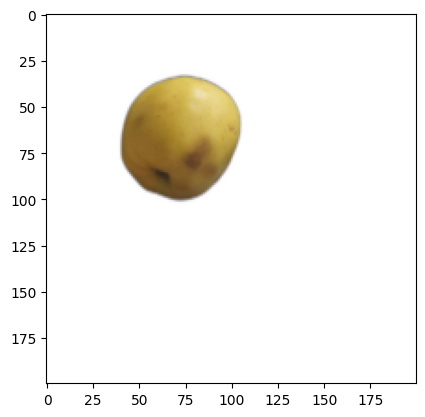

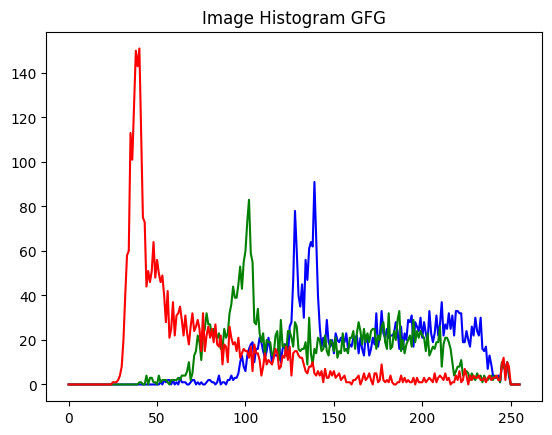

tensor(0.9550)


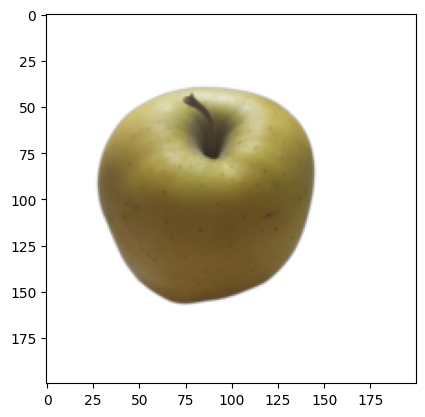

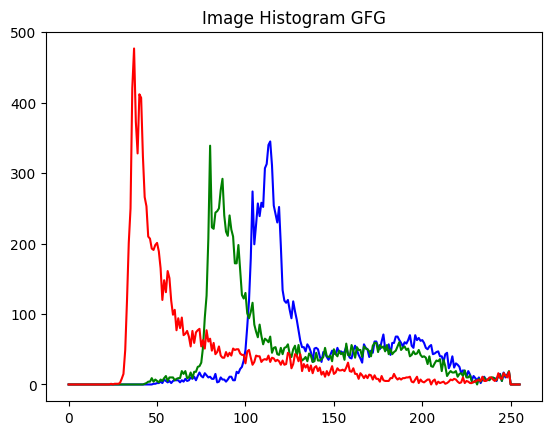

tensor(0.8429)


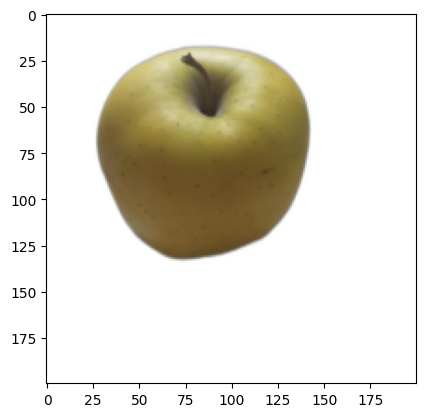

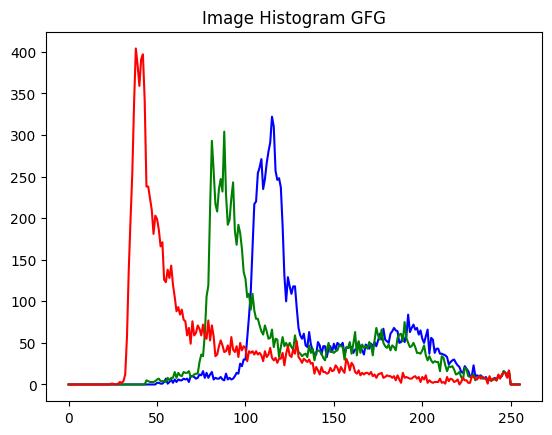

tensor(0.8485)


In [7]:
fldrs = Path.cwd() / 'CV_data' /'own_photos_no_background' / 'apple'
for file in fldrs.iterdir():

    img =  Image.open(file).convert("RGB")

    RESOLUTION = 200
    transform = transforms.Compose([
        transforms.Resize(RESOLUTION),
        transforms.CenterCrop(RESOLUTION),
    ])

    img = transform(img)
    plt.imshow(img)
    plt.show()
    
    plt = plot_histogram(img)
    plt.show()
    
    transform = transforms.ToTensor()
    img = transform(img)

    print(img.mean())



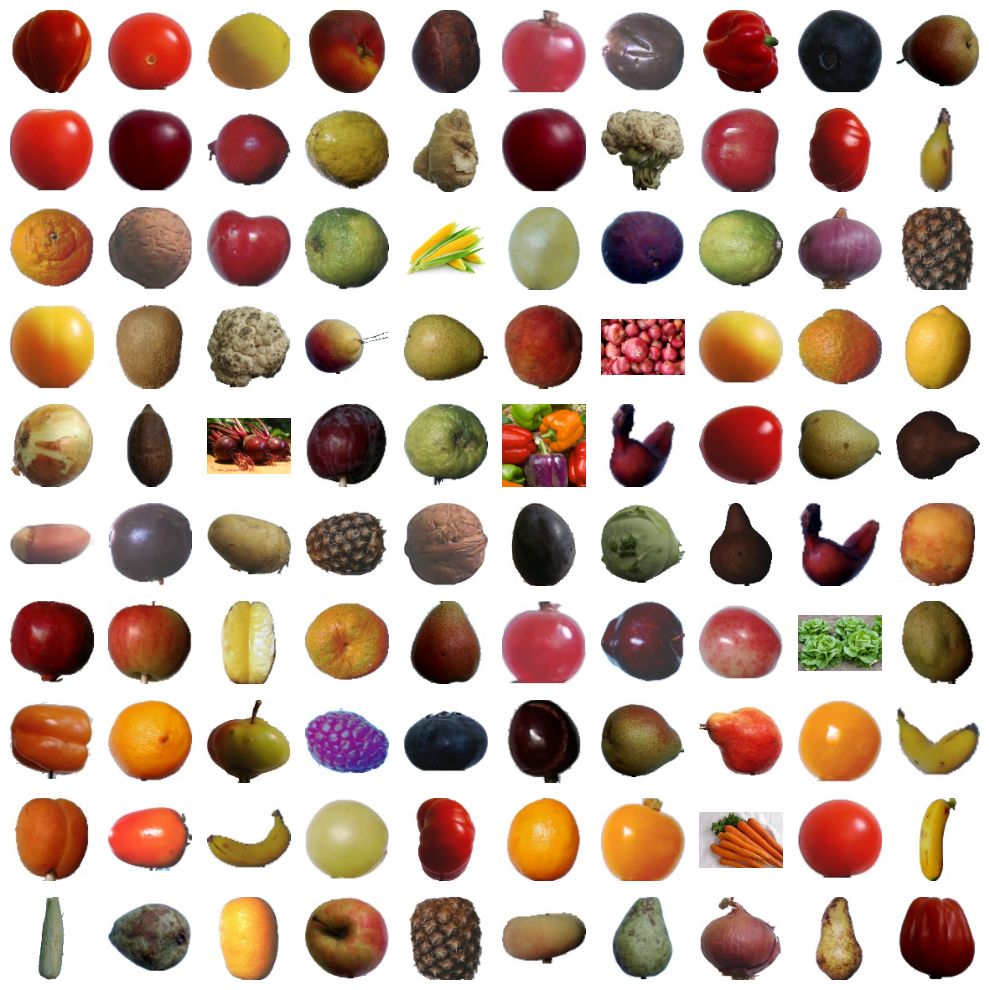

In [8]:
# Visualise 100 images at random
_,axs=plt.subplots(10,10,figsize=(10,10))
for i in range(10*10):
    axs[i%10,i//10].imshow(Image.open(files[randint(0, n_files-1)]))
_ = [ax.set_axis_off() for ax in axs.ravel()]
plt.tight_layout()
plt.show()

### 2. Dataset distribution

In [9]:
def extract_classname(path:Path) -> str:
    purepath = PurePath(path)
    return purepath.parent.name
    
extract_classname(files[123])

'beetroot'

In [10]:
prefixes = [extract_classname(p) for p in tqdm(files)]

counts = Counter(prefixes)
if None in counts: del counts[None]

prefixes_ = sorted(counts.items(), key=lambda x: x[1], reverse=True)

100%|██████████| 68441/68441 [00:00<00:00, 143290.52it/s]


In [11]:
counts

Counter({'beetroot': 706,
         'soy_beans': 117,
         'chilli_pepper': 211,
         'melon_or_piel_de_sapo': 250,
         'papaya': 643,
         'guava': 656,
         'kohlrabi': 628,
         'limes': 656,
         'coconut': 250,
         'redcurrant': 644,
         'raspberry': 656,
         'potato_sweet': 636,
         'pecan_nut': 250,
         'dates': 656,
         'kumquats': 250,
         'lychee': 642,
         'hazelnut': 621,
         'strawberry': 250,
         'mulberry': 530,
         'kaki': 630,
         'fig': 536,
         'plum': 250,
         'nectarine': 1296,
         'star_fruit_or_carambola': 614,
         'grapefruit_pink': 1312,
         'peach': 2233,
         'physalis_or_gooseberry': 1312,
         'tomato_cherry_red': 841,
         'granadilla': 1962,
         'bell_pepper': 3500,
         'apple': 4986,
         'tomato_beefsteak': 2750,
         'clementine': 1312,
         'chestnut': 550,
         'lettuce': 112,
         'turnip': 118,
 

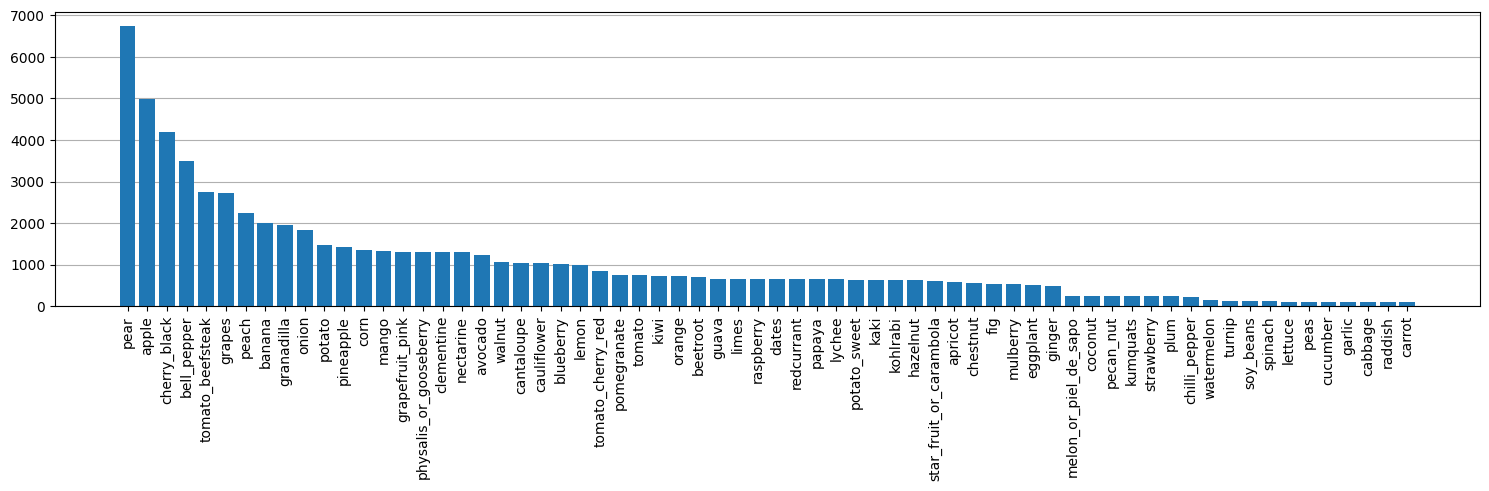

In [13]:
# Visualise dataset distribution
top_n = len(prefixes_)

fig, ax = plt.subplots(figsize=(15,5))
plt.bar(range(top_n), [v for _,v in prefixes_], zorder=2)
plt.xticks(range(top_n), [k for k,_ in prefixes_])
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

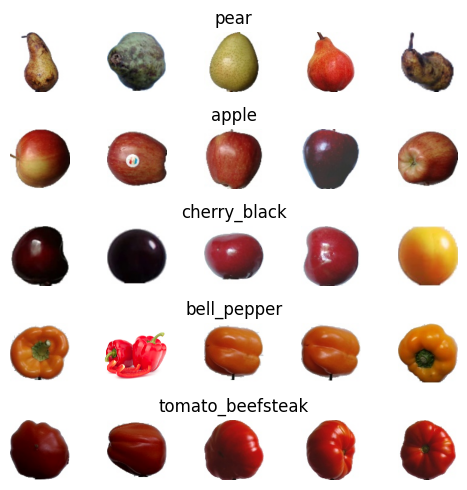

In [14]:
# Show examples for each top_n classes
top_n, n_col = 5, 5

_,axs = plt.subplots(top_n, n_col, figsize=(n_col,top_n))
for i in range(top_n):
    p, n = prefixes_[i]
    selection = [path for path,prefix in zip(files,prefixes) if prefix==p]
    for j in range(n_col):
        axs[i,j].imshow(Image.open(selection[randint(0,len(selection)-1)]))
        if j == (n_col//2): axs[i,j].set_title(p)
_ = [ax.set_axis_off() for ax in axs.ravel()]
plt.tight_layout()
plt.show()

### 3. Sizes

In [15]:
shapes = [Image.open(path).size for path in tqdm(files)]
x,y = zip(*shapes)

100%|██████████| 68441/68441 [01:05<00:00, 1047.82it/s]


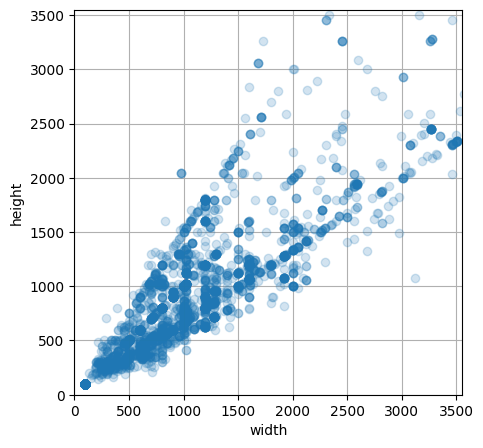

In [16]:
# Visualise the shapes
plt.figure(figsize=(5,5))
plt.scatter(x, y, alpha=0.2, zorder=2)
plt.xlabel('width'); plt.ylabel('height')
plt.ylim(0,3550); plt.xlim(0,3550)
plt.grid()
plt.show()

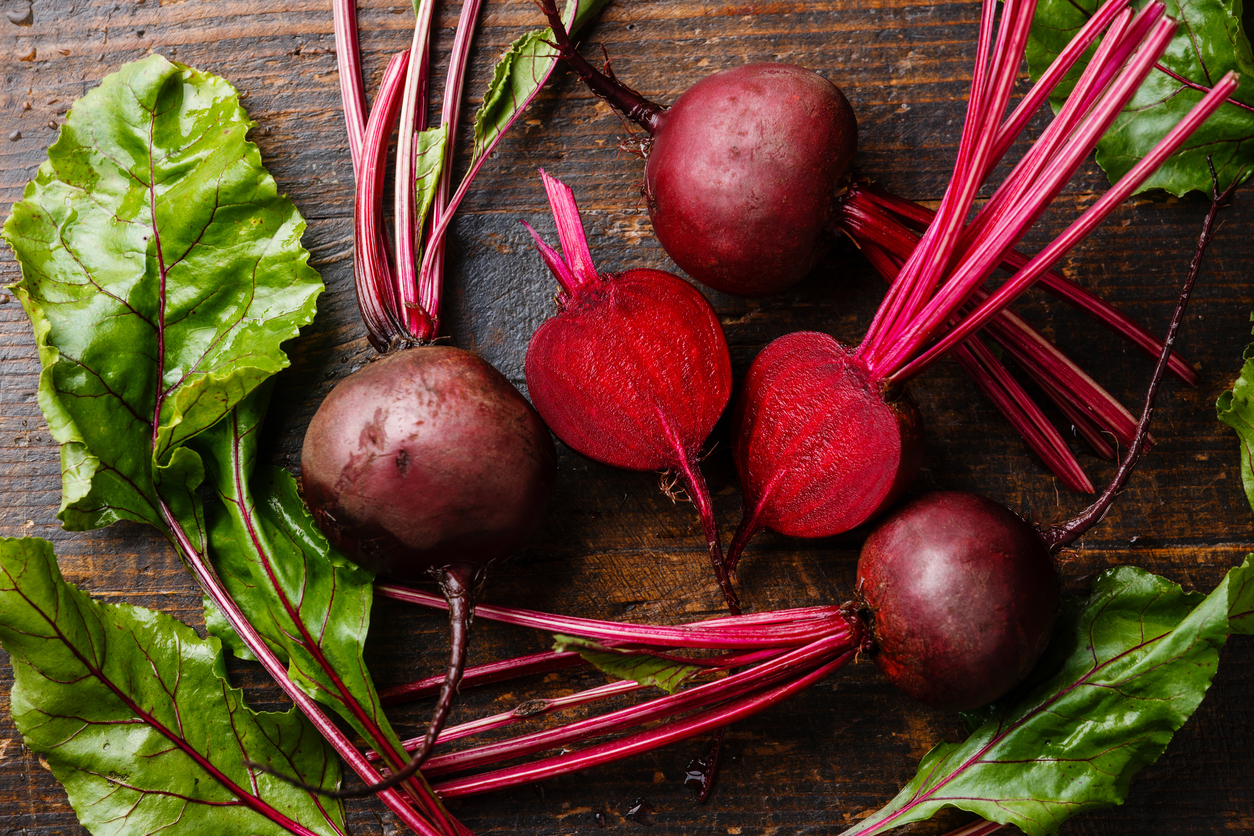

In [17]:
idx = [v>500 for v in x]
Image.open(files[idx.index(True)])

## 4. Square images

In [19]:
import os
from pathlib import Path
from PIL import Image

# Define the path to the folder with your image data
data_folder = Path.cwd() / 'CV_data' /'Extracted_dataset_input_combined'

# Define the side length that the square images should have
square_size = 224

# Get a list of all the subfolders in the data folder
subfolders = [os.path.join(data_folder, folder) for folder in os.listdir(data_folder) if os.path.isdir(os.path.join(data_folder, folder))]

counts = {}
# Loop over each subfolder (class) in the data folder
for folder in subfolders:
    # Get a list of all the image filenames in the subfolder
    image_filenames = [os.path.join(folder, filename) for filename in os.listdir(folder) if filename.endswith(".jpg") or filename.endswith(".png")]
    num_square_images = 0
    # Loop over each image in the subfolder
    for image_filename in image_filenames:
        with Image.open(image_filename) as img:
            # Check if the image is square
            if img.size[0] == img.size[1]:
                num_square_images += 1
    counts[folder.split('/')[-1]] = num_square_images
    print(f"{folder.split('/')[-1]}: {num_square_images}")

beetroot: 622
soy_beans: 9
chilli_pepper: 55
melon_or_piel_de_sapo: 250
papaya: 643
guava: 656
kohlrabi: 628
limes: 656
coconut: 250
redcurrant: 644
raspberry: 656
potato_sweet: 557
pecan_nut: 250
dates: 656
kumquats: 250
lychee: 642
hazelnut: 621
strawberry: 250
mulberry: 530
kaki: 630
fig: 536
plum: 250
nectarine: 1296
star_fruit_or_carambola: 614
grapefruit_pink: 1312
peach: 2233
physalis_or_gooseberry: 1312
tomato_cherry_red: 841
granadilla: 1962
bell_pepper: 3298
apple: 4986
tomato_beefsteak: 2750
clementine: 1312
chestnut: 550
lettuce: 13
turnip: 32
orange: 650
mango: 1243
blueberry: 1022
cabbage: 24
avocado: 1227
cantaloupe: 1048
raddish: 24
pear: 6656
pineapple: 1327
tomato: 665
banana: 1919
peas: 7
grapes: 2727
cherry_black: 4204
potato: 1463
corn: 1203
watermelon: 67
pomegranate: 670
kiwi: 641
carrot: 18
cucumber: 26
lemon: 1000
apricot: 588
onion: 1729
eggplant: 500
ginger: 405
spinach: 18
cauliflower: 952
garlic: 5
walnut: 1058


In [20]:
# Show to top N prefixes
counts = Counter(counts)
if None in counts: del counts[None]

prefixes_ = sorted(counts.items(), key=lambda x: x[1], reverse=True)

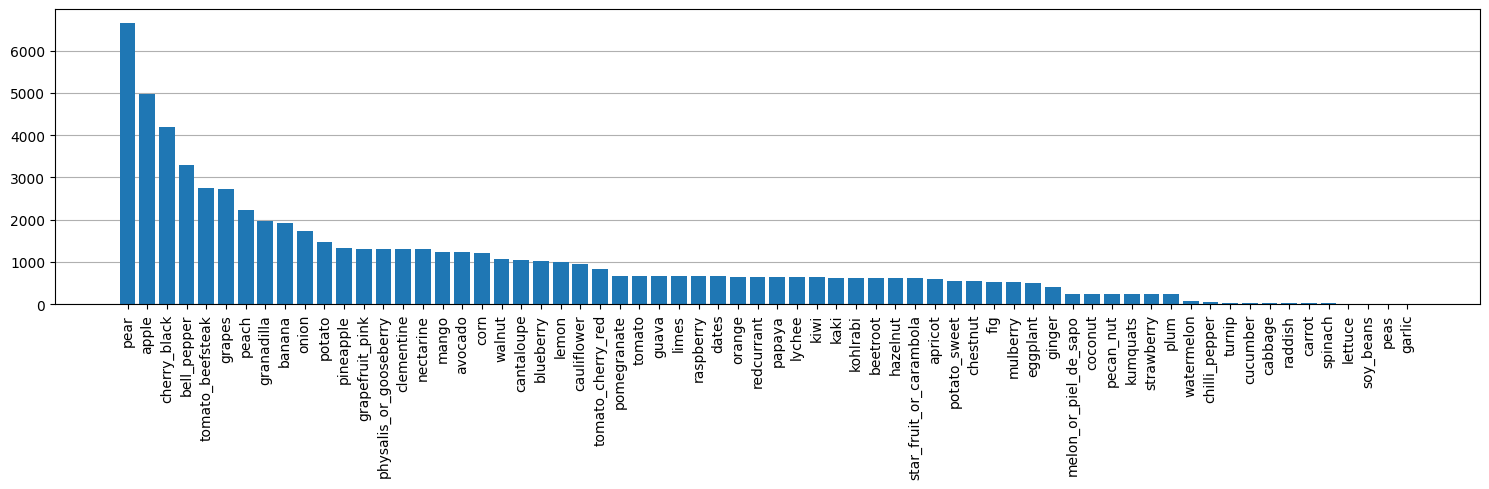

In [21]:
# Visualise dataset distribution
top_n = len(prefixes_)

fig, ax = plt.subplots(figsize=(15,5))
plt.bar(range(top_n), [v for _,v in prefixes_], zorder=2)
plt.xticks(range(top_n), [k for k,_ in prefixes_])
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.tight_layout()
plt.grid(axis='y')
plt.show()